## Yulu business case

### Business Objective - problem statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Yulu zones are located at all the appropriate locations. Yulu has recently suffered considerable dips in its revenues. Through this case study, we want to understand the factors on which the demand for these shared electric cycles depends. Specifically, we want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_rel,ttest_ind,ttest_1samp
from scipy.stats import chi2_contingency, chisquare
from scipy.stats import f_oneway, kruskal, shapiro, levene
from scipy.stats import spearmanr
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import probplot

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('yulu.csv')

In [3]:
df1 = df.copy() #keeping a copy of original dataset

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.shape

(10886, 12)

we have 10886 rows and 12 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### there is no null data

### Statistical summary

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### We can see that mean and median values for casual, registered and total users are different by large values. Hence, we can see that outliers exists in our dataset. We will check this in Outlier Analysis later

### Non graphical analysis

#### since we have numerical data for season, weather etc, I am changing them into categorical data for simplicity in analysis

In [8]:
def season(s):
    if s==1:
        return 'spring'
    if s==2:
        return 'summer'
    if s==3:
        return 'fall'
    if s==4:
        return 'winter'

In [9]:
df['season'] = df.season.apply(season)
df['season'] = df['season'].astype('O')  #changing the dtype as well

In [10]:
df['holiday']=df.holiday.apply(lambda x: 'holiday' if x==1 else 'no holiday')
df['holiday'] = df['holiday'].astype('O') #changing the dtype as well

In [11]:
df['workingday']=df.workingday.apply(lambda x: 'working day' if x==1 else 'weekend/holiday')
df['workingday'] = df['workingday'].astype('O') #changing the dtype as well

In [12]:
def weather(x):
    if x==1:
        return 'clear'
    if x==2:
        return 'cloudy'
    if x==3:
        return 'Light rain'
    if x==4:
        return 'heavy rain'

In [13]:
df['weather'] = df.weather.apply(weather)
df['weather'] = df['weather'].astype('O')

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,no holiday,weekend/holiday,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,no holiday,weekend/holiday,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,no holiday,weekend/holiday,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,no holiday,weekend/holiday,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,no holiday,weekend/holiday,clear,9.84,14.395,75,0.0,0,1,1


In [15]:
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [16]:
df.weather.value_counts()

weather
clear         7192
cloudy        2834
Light rain     859
heavy rain       1
Name: count, dtype: int64

In [17]:
df.holiday.value_counts()

holiday
no holiday    10575
holiday         311
Name: count, dtype: int64

In [18]:
df.workingday.value_counts()

workingday
working day        7412
weekend/holiday    3474
Name: count, dtype: int64

### Visual analysis - univariate and bivariate graphs

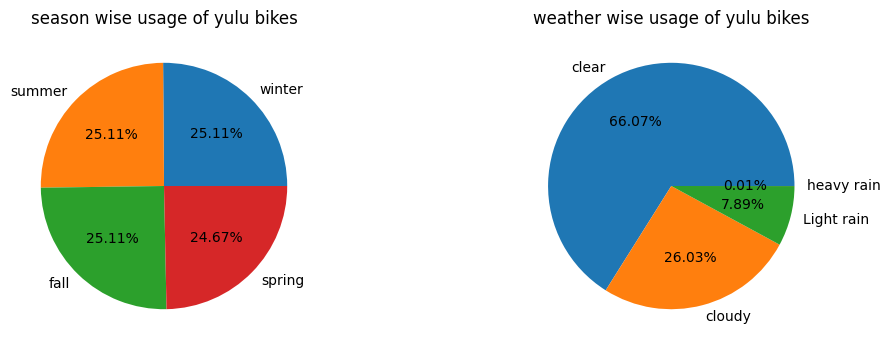

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(df['season'].value_counts().values, labels = df['season'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('season wise usage of yulu bikes')

plt.subplot(1,2,2)
plt.pie(df['weather'].value_counts().values,labels=df['weather'].value_counts().index,radius=1, autopct='%1.2f%%')
plt.title('weather wise usage of yulu bikes')

plt.show()

#### yulu bike usage is almost same for all seasons
#### yulu bike usage is high when weather is clear

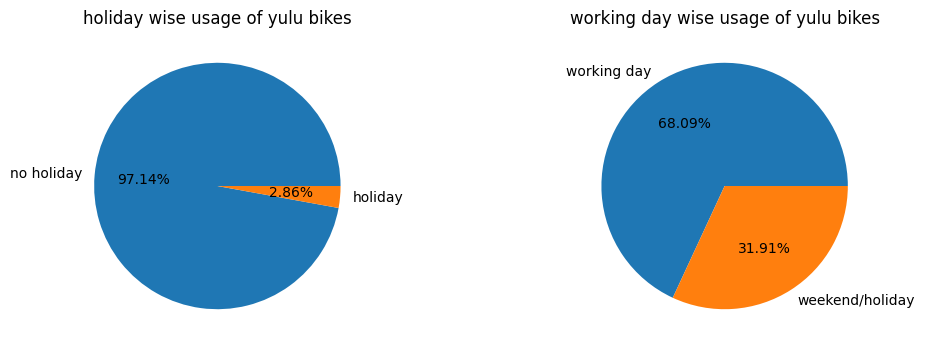

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(df['holiday'].value_counts().values, labels = df['holiday'].value_counts().index, radius=1, autopct='%1.2f%%')
plt.title('holiday wise usage of yulu bikes')

plt.subplot(1,2,2)
plt.pie(df['workingday'].value_counts().values,labels=df['workingday'].value_counts().index,radius=1, autopct='%1.2f%%')
plt.title('working day wise usage of yulu bikes')

plt.show()

#### yulu bike usage is high on "no holiday" days
#### yulu bike usage is high on working days

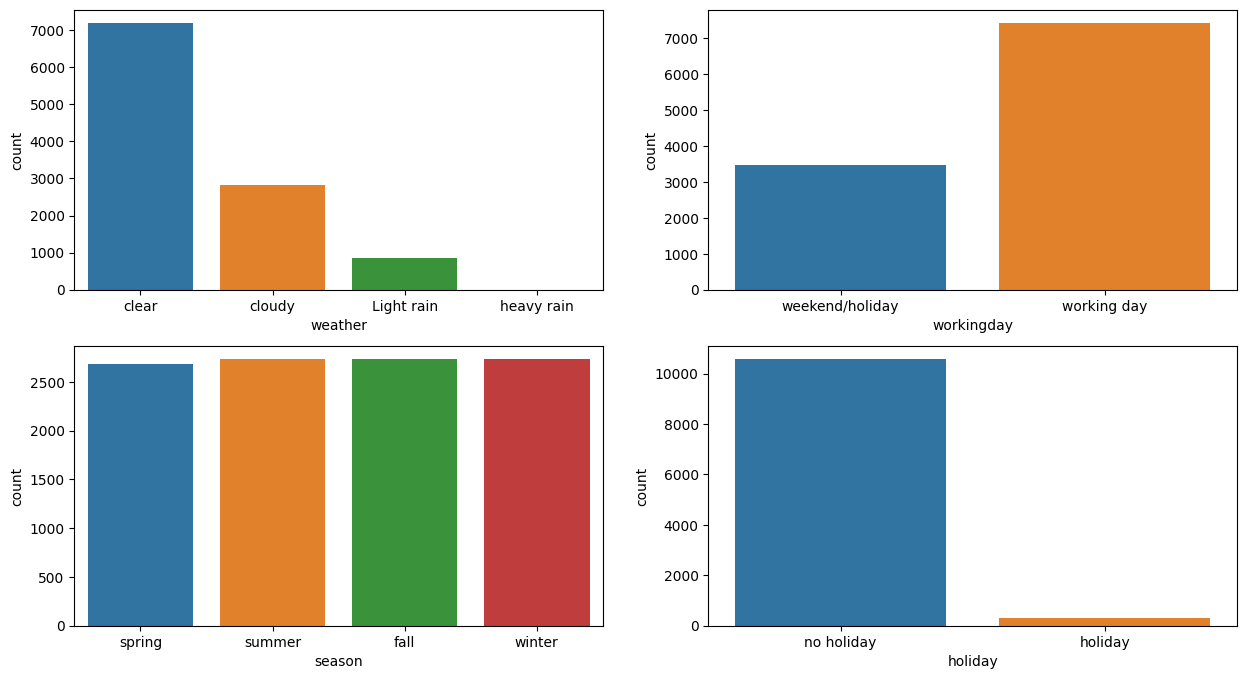

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(data=df, x='weather')
plt.subplot(2,2,2)
sns.countplot(data=df, x='workingday')
plt.subplot(2,2,3)
sns.countplot(data=df, x='season')
plt.subplot(2,2,4)
sns.countplot(data=df, x='holiday')
plt.show()

#### these graphs suggests that yulu bikes usage is high on no-holiday working day, having clear weather. There is not much impact of the season. 

**for "temp" and "atemp" column, I am creating categories, for values in these columns**

In [22]:
bins = [0,10,20,30,40,50]
groups = ['low', 'low-moderate', 'moderate', 'moderate-high', 'high']  #Categories
df['temp_cat'] = pd.cut(df['temp'], bins, labels = groups)
df['temp_cat'] = df['temp_cat'].astype('O')

In [23]:
df.groupby('temp_cat')['count'].mean()

temp_cat
high             294.000000
low               73.185862
low-moderate     150.465053
moderate         223.411398
moderate-high    334.306516
Name: count, dtype: float64

In [24]:
bins = [0,10,20,30,40,50]
groups = ['low', 'low-moderate', 'moderate', 'moderate-high', 'high']  #Categories
df['atemp_cat'] = pd.cut(df['atemp'], bins, labels = groups)
df['atemp_cat'] = df['atemp_cat'].astype('O')

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_cat,atemp_cat
0,2011-01-01 00:00:00,spring,no holiday,weekend/holiday,clear,9.84,14.395,81,0.0,3,13,16,low,low-moderate
1,2011-01-01 01:00:00,spring,no holiday,weekend/holiday,clear,9.02,13.635,80,0.0,8,32,40,low,low-moderate
2,2011-01-01 02:00:00,spring,no holiday,weekend/holiday,clear,9.02,13.635,80,0.0,5,27,32,low,low-moderate
3,2011-01-01 03:00:00,spring,no holiday,weekend/holiday,clear,9.84,14.395,75,0.0,3,10,13,low,low-moderate
4,2011-01-01 04:00:00,spring,no holiday,weekend/holiday,clear,9.84,14.395,75,0.0,0,1,1,low,low-moderate


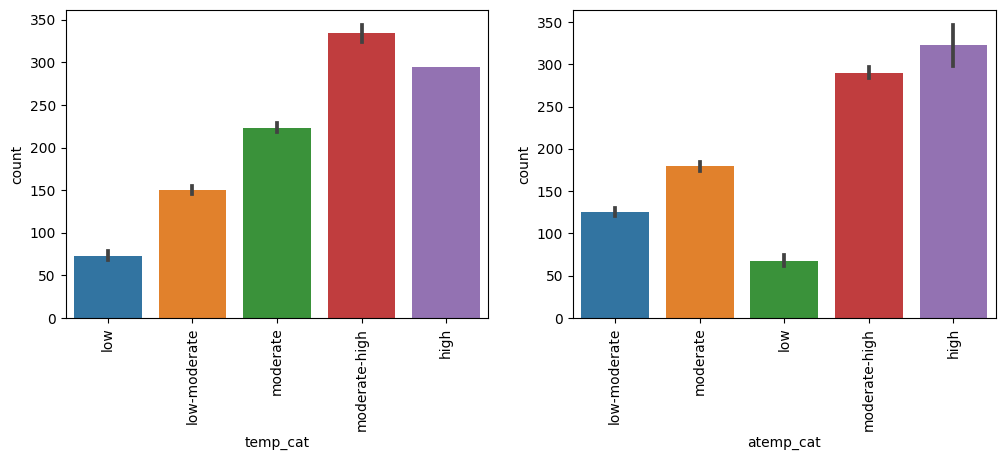

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=df, x='temp_cat', y='count', estimator='mean')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=df, x='atemp_cat', y='count', estimator='mean')
plt.xticks(rotation=90)
plt.show()

**These graph suggests that yulu bike usage is high when temperature is moderate-high to high.** 

**To check month on month growth and usage trend, I am creating a month-year column from datetime column**

In [27]:
# df['date'] = pd.to_datetime(df.datetime).dt.date
# df['month'] = pd.to_datetime(df.datetime).dt.month
# df['year'] = pd.to_datetime(df.datetime).dt.year
df['month-year'] = pd.to_datetime(df.datetime).dt.strftime('%Y-%m')
df_date = df.groupby(['month-year'])['count'].mean().reset_index()
df_date.head()


,month-year,count
0,2011-01,54.645012
1,2011-02,73.641256
2,2011-03,86.849776
3,2011-04,111.026374
4,2011-05,174.809211


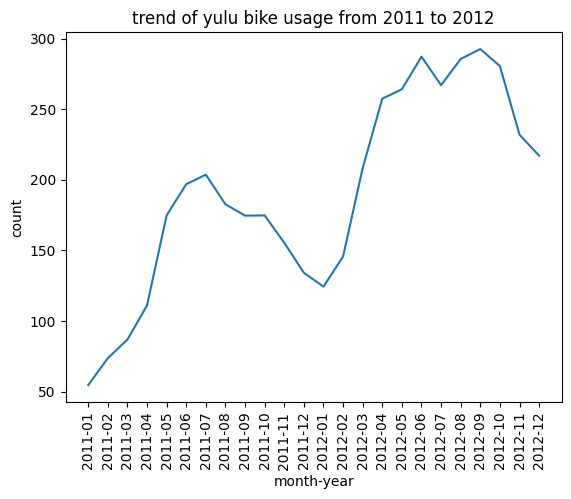

In [28]:
sns.lineplot(data=df_date, x='month-year', y='count')
plt.xticks(rotation=90)
plt.title("trend of yulu bike usage from 2011 to 2012")
plt.show()

#### this graph suggests that, from start of year 2011, mean usage of yulu bikes shows increasing trend, but usage decreases during the end of year. Again from start of year 2012, usage increased. But again around the end of year, usage is showing decreasing trend.

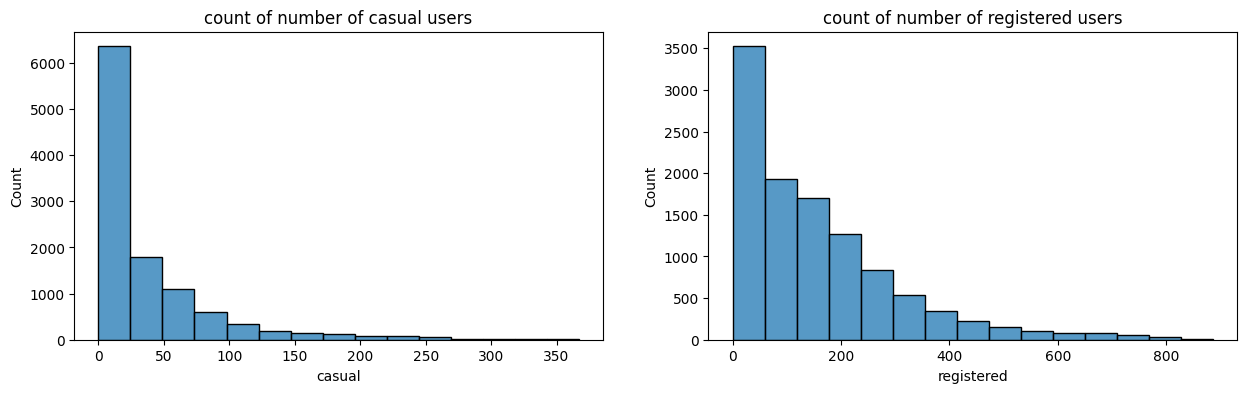

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='casual', bins=15 )
plt.title('count of number of casual users')
plt.subplot(1,2,2)
sns.histplot(data=df, x='registered', bins=15)
plt.title('count of number of registered users')

plt.show()

#### we can see that registered users are much more than casual users which is a positive point for Yulu 

### Outlier analysis

### let's check for outliers using boxplot

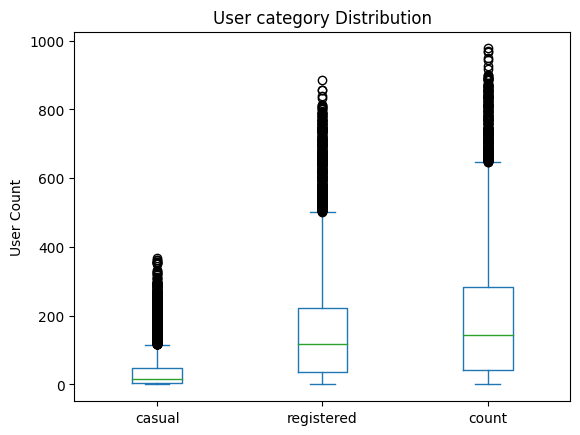

In [30]:
df1 = df[['casual','registered','count']]

df1.plot(kind='box')

plt.ylabel('User Count')
plt.title('User category Distribution')
plt.show()


**Outliers exists in all three columns**

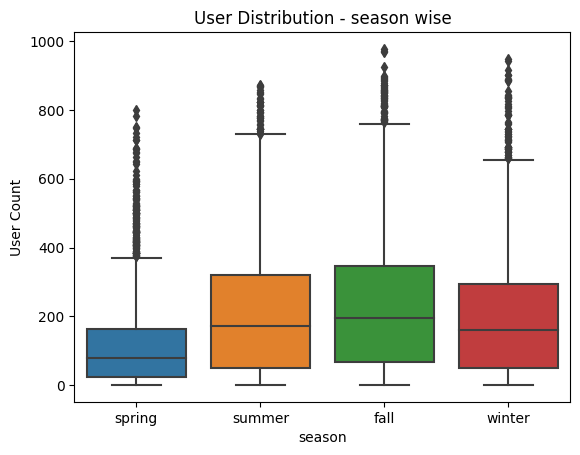

In [31]:
sns.boxplot(data=df, x='season', y='count')
plt.ylabel('User Count')
plt.title('User Distribution - season wise')
plt.show()

### Outliers removal  - using IQR method

In [32]:
num_cols = [i for i in df.columns if df[i].dtypes != 'O']  #getting all numerical columns
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [33]:
def Get_Numerical_Outlier_indices(df, cols):
    out_ind = []
    for col in cols:
        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.75)
        iqr = q2-q1
        rare_ind = df[((df[col]<(q1-(1.5*iqr)))|(df[col]>(q2+(1.5*iqr))))].index
        out_ind.extend(rare_ind)

    out_ind = set(out_ind)
    return out_ind

numerical_outlier_indices = Get_Numerical_Outlier_indices(df, num_cols)

In [34]:
outlier_len = len(numerical_outlier_indices)   #number of outliers in dataset
orig_len =  len(df) 
print(f'original length of data: {orig_len}')
print(f'outliers length: {outlier_len}')

original length of data: 10886
outliers length: 1368


In [35]:
df = df.drop(numerical_outlier_indices) #dropping outlier rows

In [36]:
data_len = len(df) #dataset left with us
print(f'data left with us after outlier removal: {data_len}')
print(f'% of data left after outlier removal: {round(data_len*100/orig_len,2)}%')


data left with us after outlier removal: 9518
% of data left after outlier removal: 87.43%


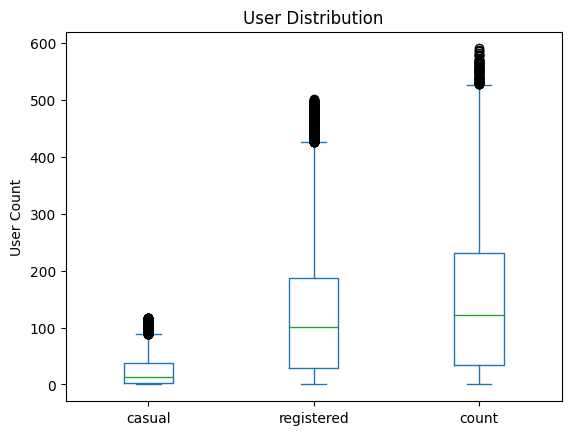

In [37]:
df2 = df[['casual','registered','count']]

df2.plot(kind='box')

plt.ylabel('User Count')
plt.title('User Distribution')
plt.show()


#### outliers are reduced

### Correlation

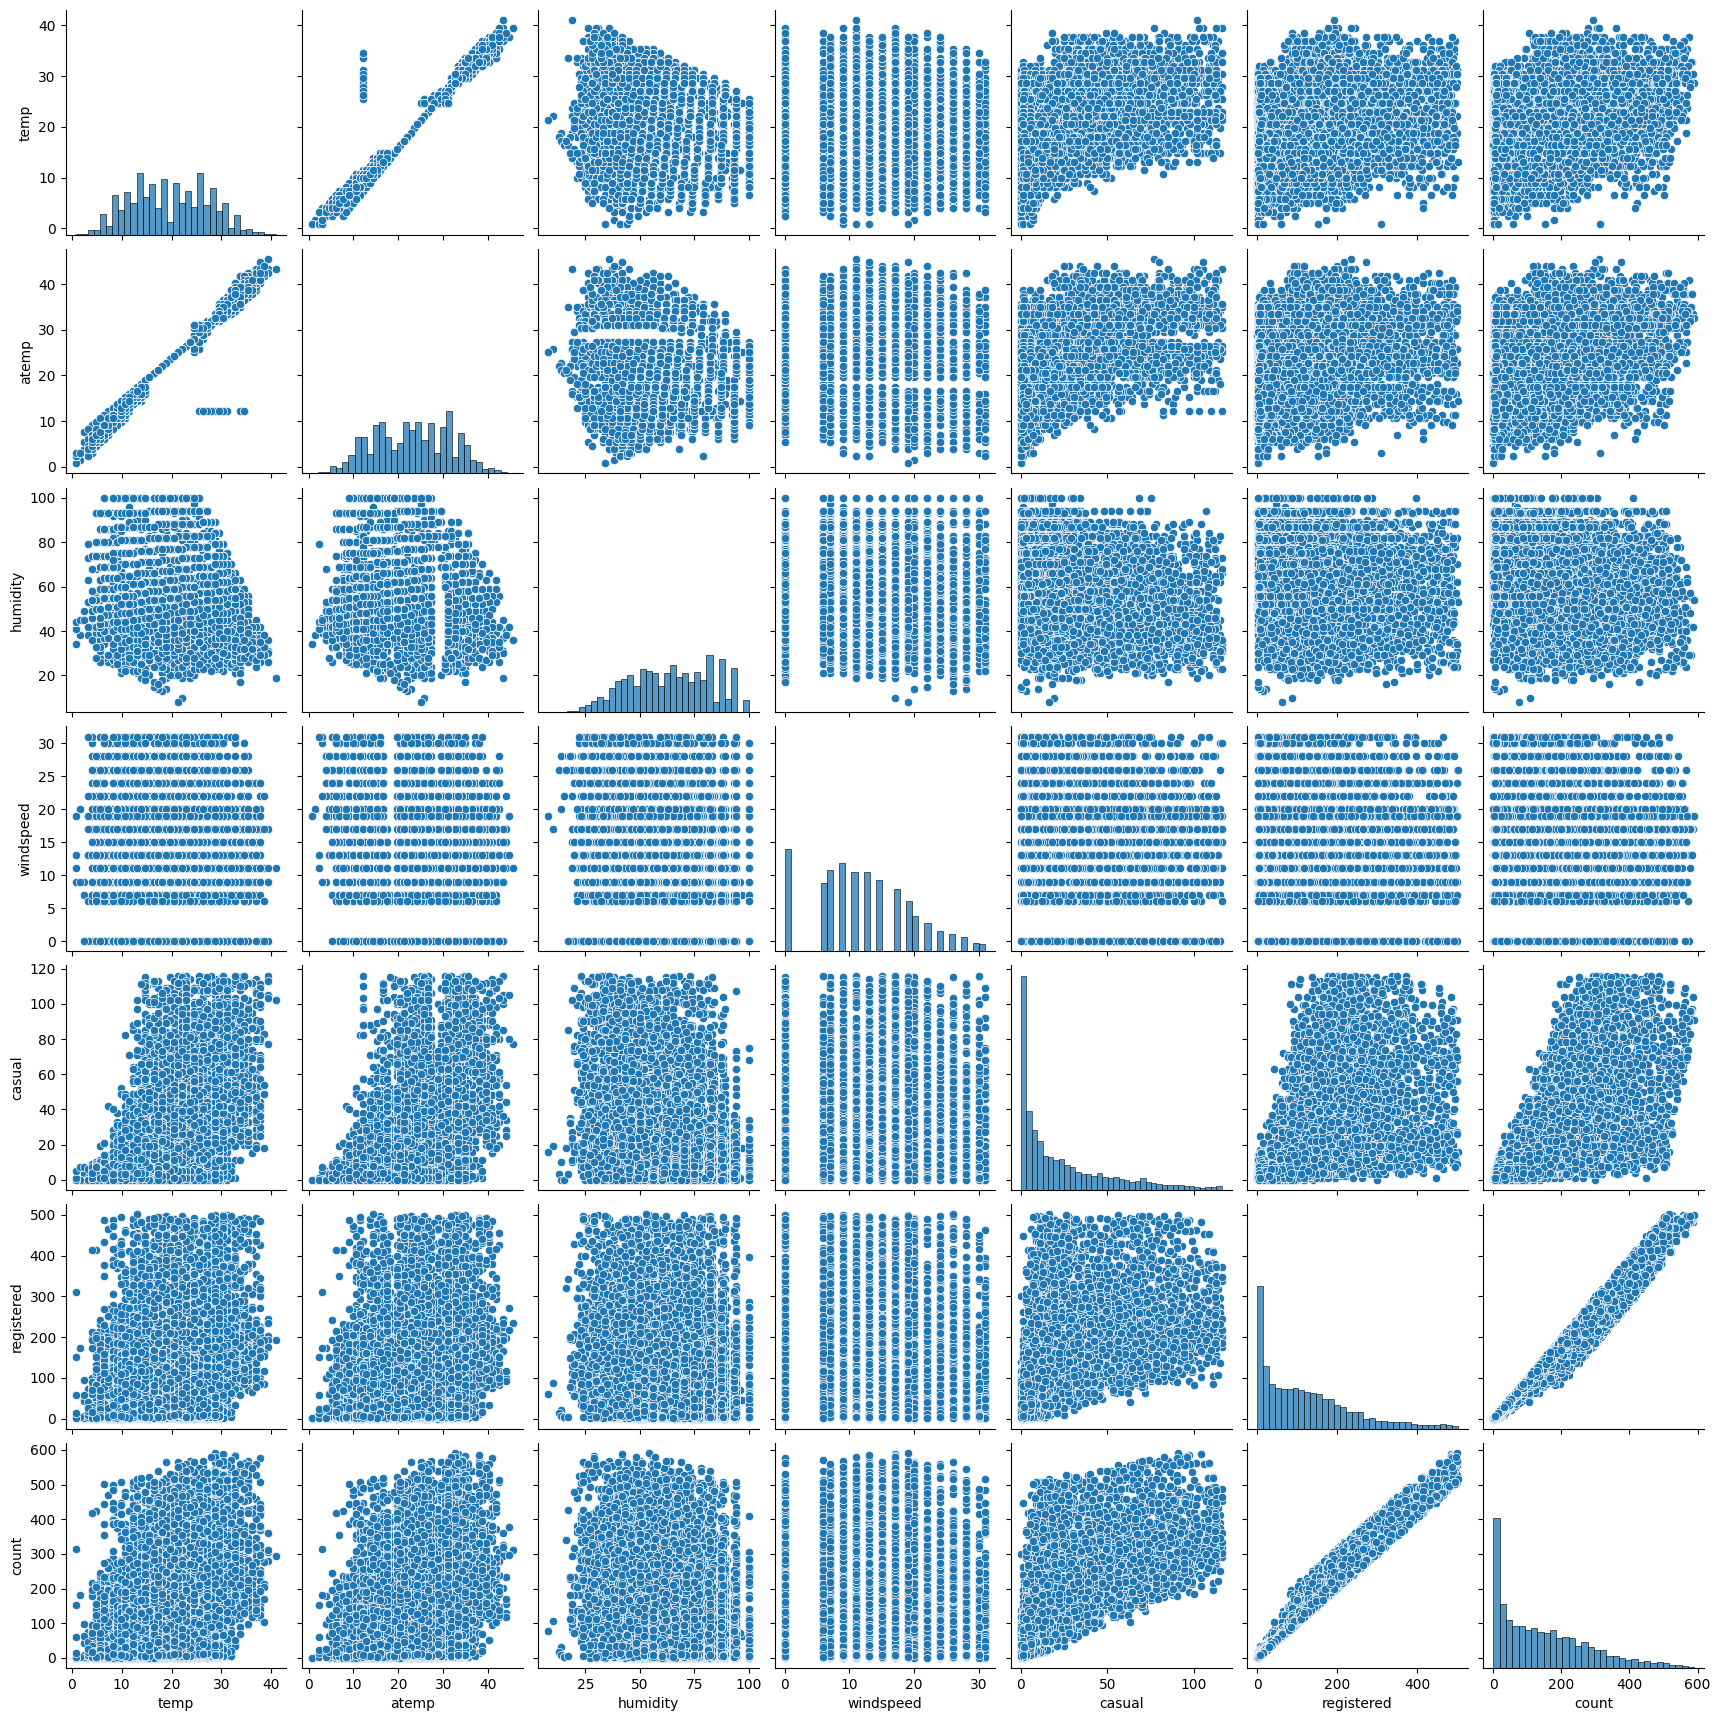

In [185]:
sns.pairplot(data=df)
plt.show()

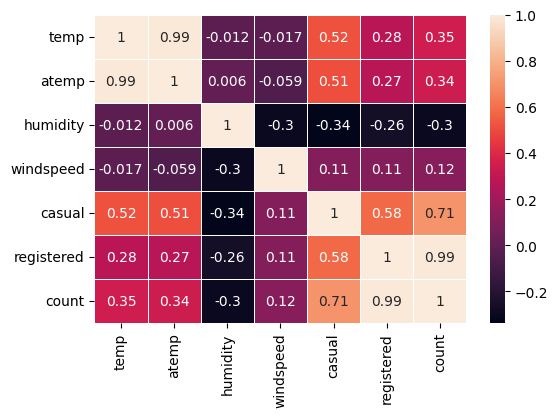

In [186]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=.5)
plt.show()

#### from here, we can conclude that registered users contribute more towards total users as there is a high correlation between them.

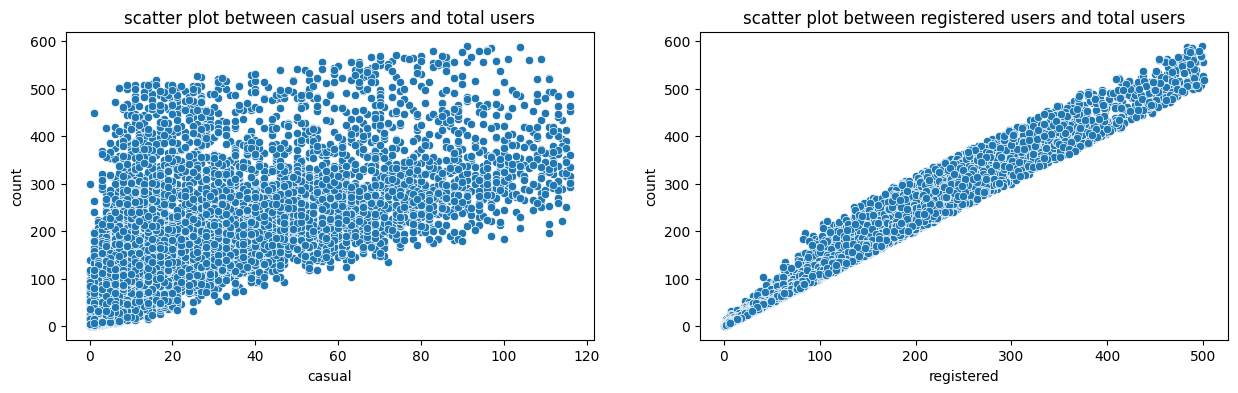

In [187]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='casual', y='count')
plt.title("scatter plot between casual users and total users")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='registered', y='count')
plt.title("scatter plot between registered users and total users")
plt.show()

#### this scatterplot confirms that there is a high correlation between registered customers and total yulu bike users.

## Hypothesis testing

#### test stats:

alpha = 0.05 (95% significance level)

#### Test 1 
#### Working Day has effect on number of electric bikes rented

 h0: Working Day has **no** effect on number of electric bikes rented
 
 ha: Working Day has effect on number of electric bikes rented



#### Assumptions

Observations in each sample are normally distributed (follows guassian curve)

Observations in each sample are independent and identically distributed (iid).

In [38]:
working = df[df['workingday']=='working day']
nonworking = df[df['workingday']=='weekend/holiday']

h0: data has gaussian distribution

ha: data does not have gaussian distribution

In [39]:
shapiro(working['count']) , shapiro(nonworking['count'])

(ShapiroResult(statistic=0.9170000553131104, pvalue=0.0),
 ShapiroResult(statistic=0.8963597416877747, pvalue=1.6402717005353784e-39))

p-values for both data is less than alpha(0.05), meaning **reject null hypothesis: Data is not guassian** Let's check with qq-plot:

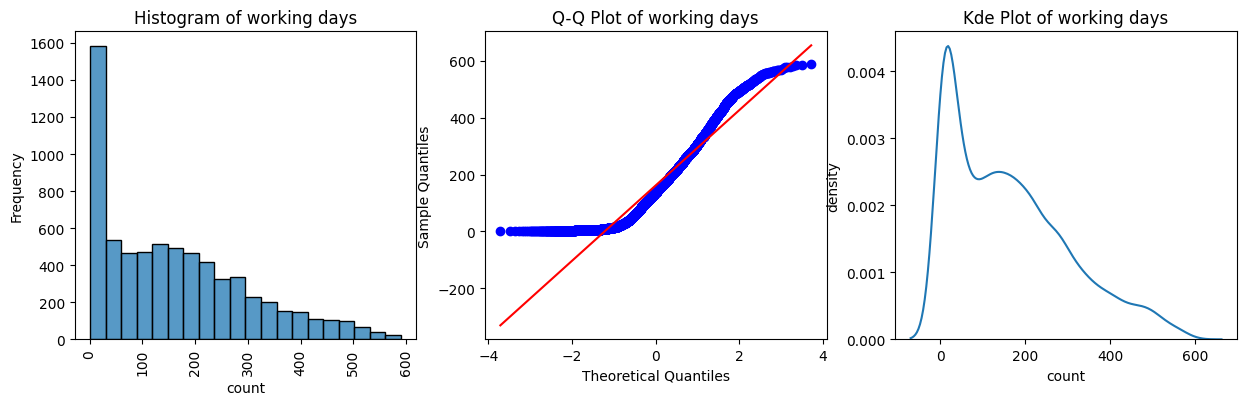

In [50]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(working['count'], bins=20)
plt.xlabel('count')
plt.ylabel('Frequency')
plt.title(f'Histogram of working days')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
probplot(working['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of working days')

plt.subplot(1,3,3)
sns.kdeplot(working['count'])
plt.xlabel('count')
plt.ylabel('density')
plt.title(f'Kde Plot of working days')

plt.show()

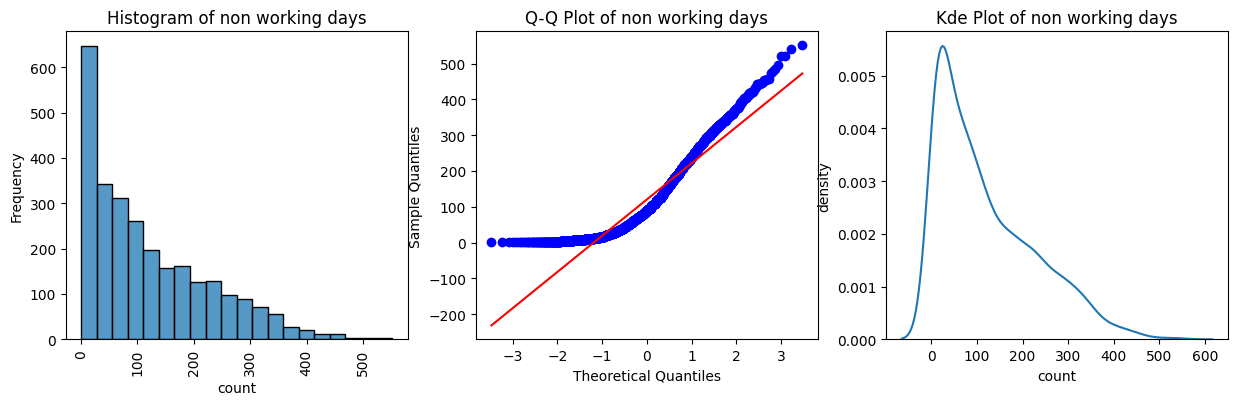

In [191]:

plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(nonworking['count'], bins=20)
plt.xlabel('count')
plt.ylabel('Frequency')
plt.title(f'Histogram of non working days')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
probplot(nonworking['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of non working days')

plt.subplot(1,3,3)
sns.kdeplot(nonworking['count'])
plt.xlabel('count')
plt.ylabel('density')
plt.title(f'Kde Plot of non working days')

plt.show()

#### qq-plot suggests that our data is not gaussian. For large practical data, assumptions sometimes do not holds true.

**proceeding with 2-sample t-test to check if the data is independent of each other**

In [192]:
#Mean of both groups

working_mean = working['count'].mean()
nonworking_mean = nonworking['count'].mean()
working_mean,nonworking_mean  

(161.97010309278352, 120.68108504398828)

In [193]:
# Standard deviation of both group

working_std = working['count'].std()
nonworking_std = nonworking['count'].std()
working_std,nonworking_std

(138.58857204299835, 106.74781110470883)

In [194]:
stats, p = ttest_ind(working['count'],nonworking['count'])
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: bike usage depends on working day')
else:
    print('fail to reject null hypothesis: bike usage does not depends on working day ')

p-value: 5.384896180235767e-44
reject null hypothesis: bike usage depends on working day


#### Test result: yulu bike usage depends on working day

#### Test 2

#### No. of cycles rented similar or different in different seasons

h0: cycle usage is independent of season

ha: cycle usage depends on season

#### Assumptions

Observations in each sample are normally distributed.

Observations in each sample should have same variance

In [195]:
df.season.value_counts()

season
winter    2475
spring    2463
summer    2292
fall      2288
Name: count, dtype: int64

In [40]:
summer = df[df['season']=='summer']
winter = df[df['season']=='winter']
fall = df[df['season']=='fall']
spring = df[df['season']=='spring']

In [41]:
#Check if data is gaussian

# h0: data has gaussian distribution
# ha: data does not have gaussian distribution

shapiro(summer['count']), shapiro(winter['count']), shapiro(fall['count']), shapiro(spring['count'])

(ShapiroResult(statistic=0.9176210165023804, pvalue=1.2426929547549821e-33),
 ShapiroResult(statistic=0.9272552728652954, pvalue=4.5287389233367154e-33),
 ShapiroResult(statistic=0.9323311448097229, pvalue=5.115096899524057e-31),
 ShapiroResult(statistic=0.8594179153442383, pvalue=2.0725204287364044e-42))

p-values for data is less than alpha, meaning **reject null hypothesis: Data is not guassian** Let's check with qq-plot:

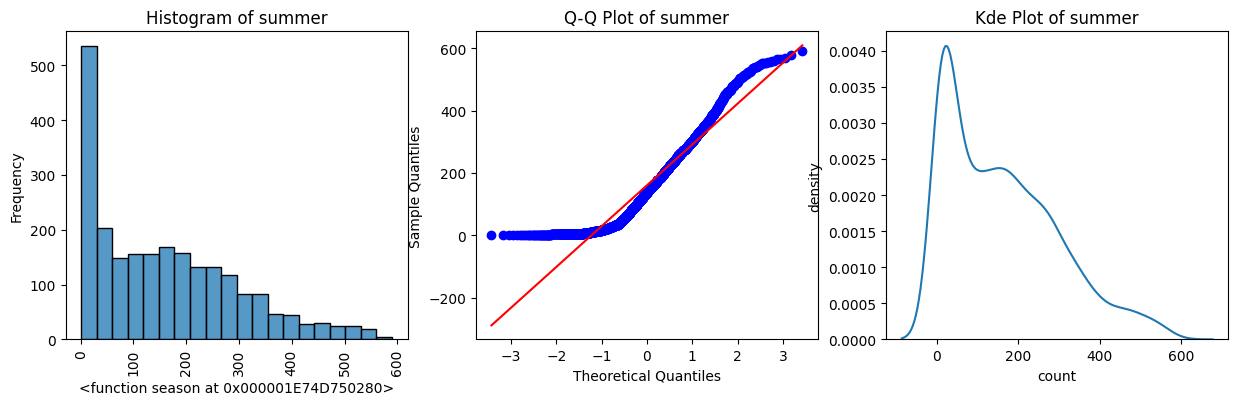

In [198]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(summer['count'], bins=20)
plt.xlabel(f'{season}')
plt.ylabel('Frequency')
plt.title(f'Histogram of summer')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(summer['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of summer')

plt.subplot(1,3,3)
sns.kdeplot(summer['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of summer')

plt.show()

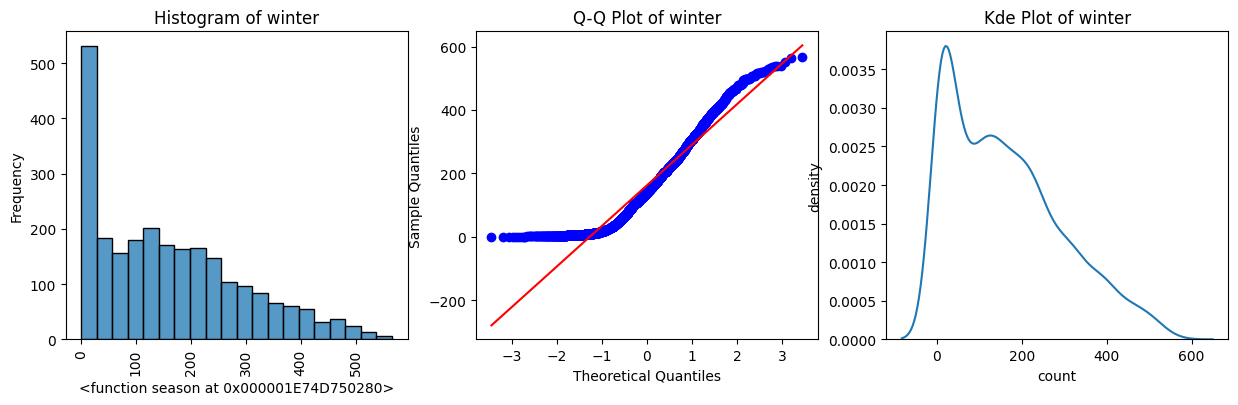

In [199]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(winter['count'], bins=20)
plt.xlabel(f'{season}')
plt.ylabel('Frequency')
plt.title(f'Histogram of winter')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(winter['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of winter')

plt.subplot(1,3,3)
sns.kdeplot(winter['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of winter')

plt.show()

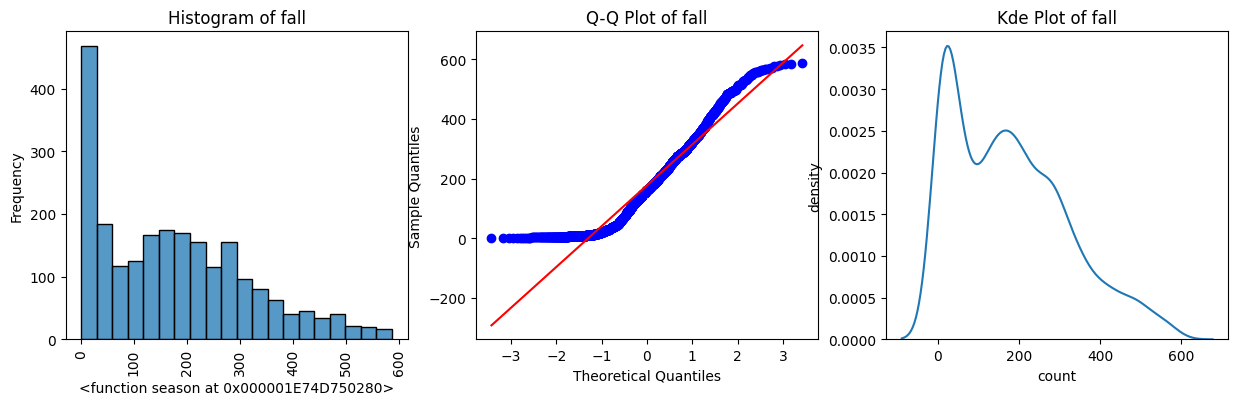

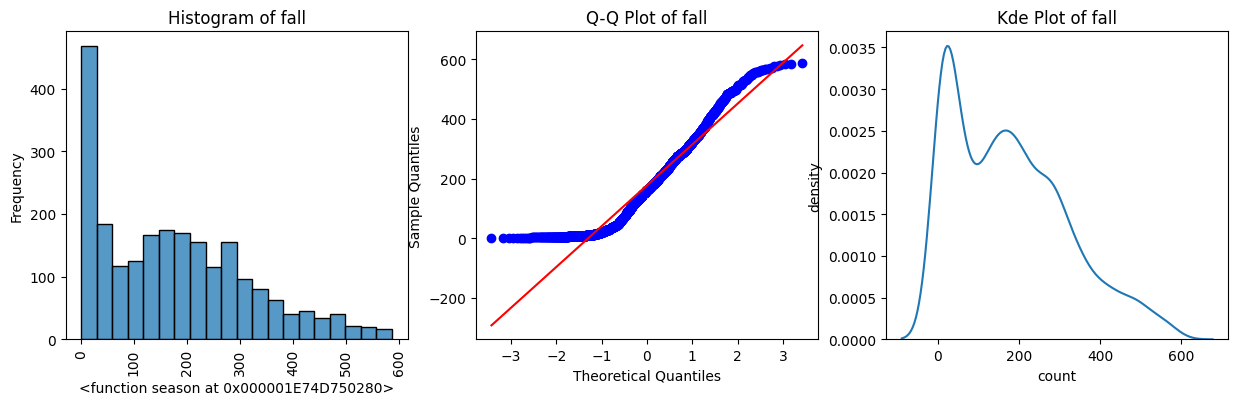

In [200]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(fall['count'], bins=20)
plt.xlabel(f'{season}')
plt.ylabel('Frequency')
plt.title(f'Histogram of fall')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(fall['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of fall')

plt.subplot(1,3,3)
sns.kdeplot(fall['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of fall')

plt.show()

In [201]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(spring['count'], bins=20)
plt.xlabel(f'{season}')
plt.ylabel('Frequency')
plt.title(f'Histogram of spring')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(spring['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of spring')

plt.subplot(1,3,3)
sns.kdeplot(spring['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of spring')

plt.show()

**qq-plot suggests that data is not guassian. Let's check for variance using levene test:**

h0: variance is same

ha: variance is different

In [42]:
summer = df[df['season']=='summer']['count']
winter = df[df['season']=='winter']['count']
fall = df[df['season']=='fall']['count']
spring = df[df['season']=='spring']['count']

In [43]:
stats, p = levene(summer, winter, fall, spring)
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: variance is different')
else:
    print('fail to reject null hypothesis: variance is same ')

p-value: 6.687186315723853e-87
reject null hypothesis: variance is different


Assumptions are not holding true, but still proceeding with ANOVA test:

In [44]:
stats, p = f_oneway(summer, winter, fall, spring)
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: bike usage depends on season')
else:
    print('fail to reject null hypothesis: bike usage is independent of season ')

p-value: 1.3285141709950642e-98
reject null hypothesis: bike usage depends on season


As mentioned, for large practical data, assumptions sometimes do not hold true. So applying Kruskal test:

In [45]:
stats, p = kruskal(summer, winter, fall, spring)
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: bike usage depends on season')
else:
    print('fail to reject null hypothesis: bike usage is independent of season ')

p-value: 9.09294670507136e-93
reject null hypothesis: bike usage depends on season


#### Test result: Yulu bike usage depends on season

#### Test 3

#### No. of cycles rented similar or different in different weather

h0: cycle usage is independent of weather

ha: cycle usage dependent on weather

#### Assumptions:

Observations in each sample are normally distributed.

Observations in each sample should have same variance

In [46]:
df.weather.value_counts()

weather
clear         6176
cloudy        2568
Light rain     773
heavy rain       1
Name: count, dtype: int64

In [47]:
clear = df[df['weather']=='clear']
cloudy = df[df['weather']=='cloudy']
lightRain = df[df['weather']=='Light rain']
# heavyRain = df[df['weather']=='heavy rain']

In [48]:
shapiro(clear['count']), shapiro(cloudy['count']), shapiro(lightRain['count'])

(ShapiroResult(statistic=0.9150597453117371, pvalue=0.0),
 ShapiroResult(statistic=0.91085284948349, pvalue=2.1035535621065664e-36),
 ShapiroResult(statistic=0.8443405628204346, pvalue=7.518643302497174e-27))

p-values for data is less than alpha, meaning **reject null hypothesis: Data is not guassian** Let's check with qq-plot:

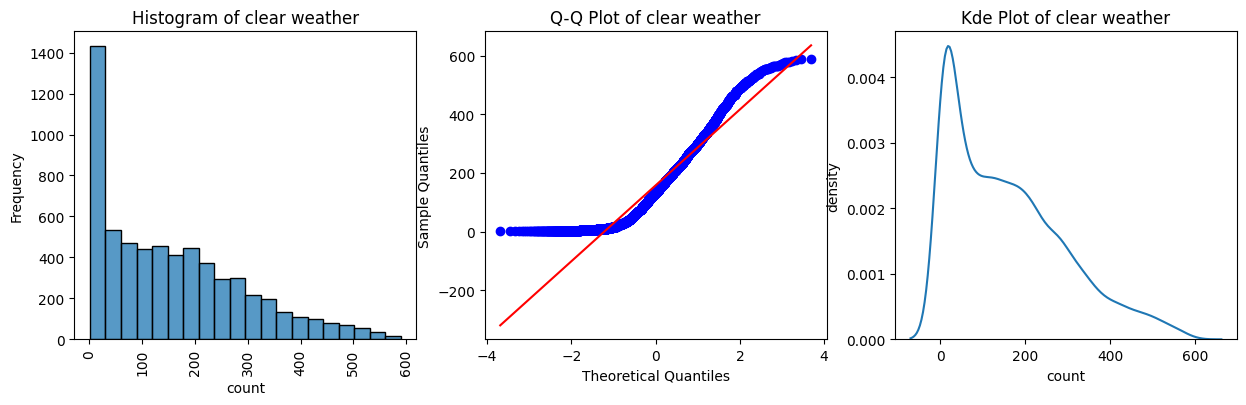

In [51]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(clear['count'], bins=20)
# plt.xlabel('clear')
plt.ylabel('Frequency')
plt.title(f'Histogram of clear weather')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(clear['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of clear weather')

plt.subplot(1,3,3)
sns.kdeplot(clear['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of clear weather')

plt.show()

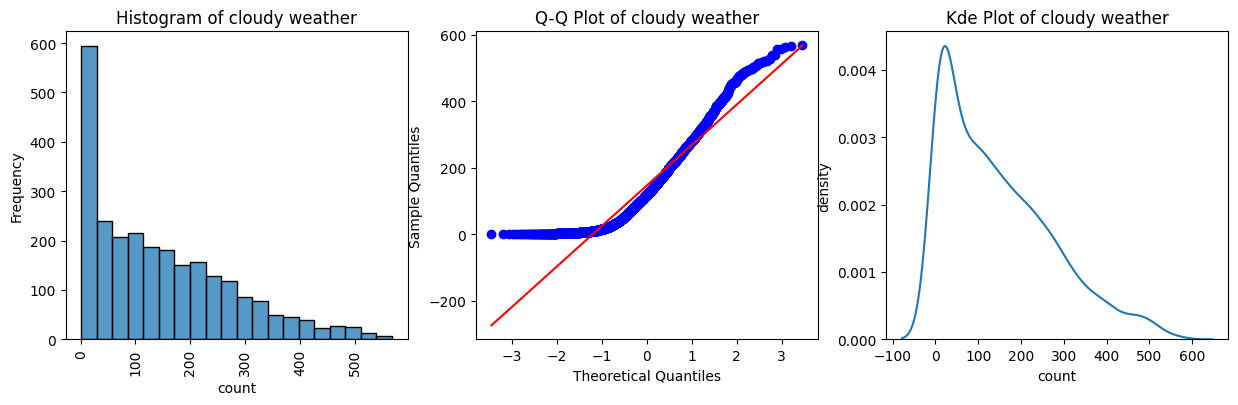

In [52]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(cloudy['count'], bins=20)
# plt.xlabel('clear')
plt.ylabel('Frequency')
plt.title(f'Histogram of cloudy weather')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(cloudy['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of cloudy weather')

plt.subplot(1,3,3)
sns.kdeplot(cloudy['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of cloudy weather')

plt.show()

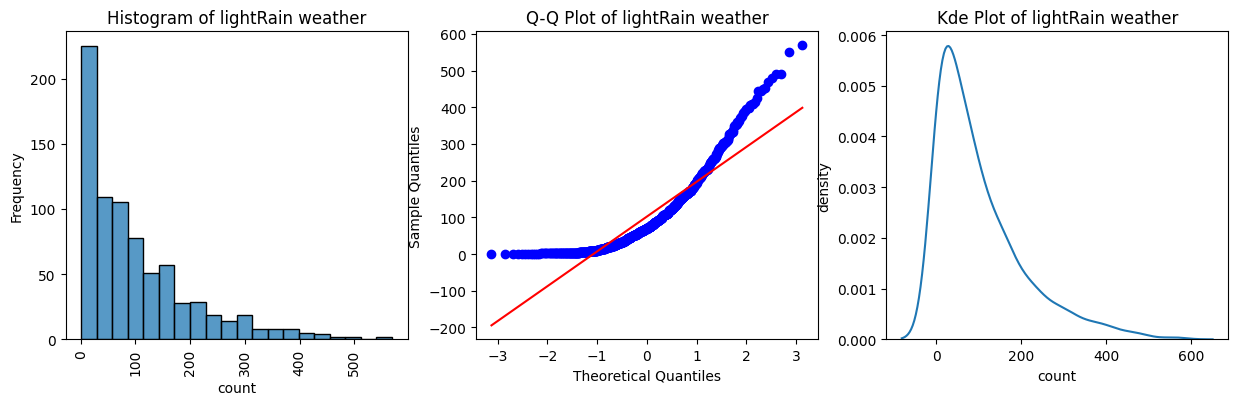

In [53]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.histplot(lightRain['count'], bins=20)
# plt.xlabel('clear')
plt.ylabel('Frequency')
plt.title(f'Histogram of lightRain weather')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
probplot(lightRain['count'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title(f'Q-Q Plot of lightRain weather')

plt.subplot(1,3,3)
sns.kdeplot(lightRain['count'])
#     plt.xlabel(column)
plt.ylabel('density')
plt.title(f'Kde Plot of lightRain weather')

plt.show()

qq-plot suggests that data is **not guassian**. Let's check for variance using levene test:

h0: variance is same

ha: variance is different

In [54]:
clear = df[df['weather']=='clear']['count']
cloudy = df[df['weather']=='cloudy']['count']
lightRain = df[df['weather']=='Light rain']['count']

In [55]:
stat, p = levene(clear, cloudy, lightRain)
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: variance is different')
else:
    print('fail to reject null hypothesis: variance is same ')

p-value: 1.1479762859567072e-28
reject null hypothesis: variance is different


Assumptions are not holding true, still applying ANOVA test

In [56]:
stats, p = f_oneway(clear, cloudy, lightRain)
if p < 0.05:
    print('reject null hypothesis: bike usage depends on weather')
else:
    print('fail to reject null hypothesis: bike usage is independent of weather ')

reject null hypothesis: bike usage depends on weather


As mentioned, for large practical data, assumptions sometimes do not hold true. So applying Kruskal test:

In [57]:
stats, p = kruskal(clear, cloudy, lightRain)
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: bike usage depends on weather')
else:
    print('fail to reject null hypothesis: bike usage is independent of weather ')

p-value: 7.1193803165392e-26
reject null hypothesis: bike usage depends on weather


#### Test result: yulu bike usage depends on weather

#### Test 4

#### Weather is dependent on season

h0: weather is independent of season

ha: weather depends on season

Applying **chi-sqaure test** to check the dependency between season and weather

In [58]:
contingency_table = pd.crosstab(df['season'], df['weather'])

stats, p, dof, e = chi2_contingency(contingency_table)
print(f'p-value: {p}')
if p < 0.05:
    print('reject null hypothesis: weather depends on season')
else:
    print('fail to reject null hypothesis: weather is independent of season')

p-value: 1.0976664201931213e-07
reject null hypothesis: weather depends on season


#### Test result: weather is dependent on season

#### Insights and recommendation

1. **Working Day Dependency:**
   - **Increase Availability on Working Days:** Since Yulu bike usage is higher on working days, consider increasing the availability of Yulu bikes during weekdays, especially in areas with a high concentration of offices and workplaces.

   - **Special Promotions for Commuters:** To encourage more people to use Yulu bikes for their daily commutes, consider offering special promotions, discounts, or loyalty programs for riders who use Yulu bikes on working days. 

2. **Seasonal Dependency:**
   - **Adjust Fleet Size Seasonally:** Yulu bike usage may vary by season. During peak seasons, such as spring and summer, increase the size of your bike fleet to meet higher demand.

   - **Promote Seasonal Offers:** Create seasonal marketing campaigns and promotions that align with the weather and outdoor activities. For example, during the summer, promote Yulu bike rides to parks, beaches, and other outdoor destinations.

3. **Weather Dependency:**
   - **Weather Alerts and Notifications:** Implement a system that sends weather alerts and notifications to riders. When the weather is clear and suitable for biking, send notifications to riders
 
4. **User Retention and Engagement:**

    - **Focus on Registered User Experience:** Pay special attention to the needs and preferences of registered users. Offer discounts and targeted promotions to keep them engaged.

    - **Enhance User App Experience:** Continuously improve the Yulu mobile app or platform to make it user-friendly
    